In [89]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
#For some Statistics
from scipy.stats import norm, skew
from sklearn.preprocessing import Imputer
from mpl_toolkits.mplot3d import Axes3D
train=pd.read_csv('train_class.csv')
test=pd.read_csv('test_class_1.csv')
train.drop("Unnamed: 0",axis=1,inplace=True)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,880,20,RL,NaN,7000,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2009,WD,Normal,136500
1,1147,20,RL,NaN,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,180000
2,1347,20,RL,NaN,20781,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,262500
3,1081,20,RL,80.0,11040,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,145000
4,229,20,RL,70.0,8521,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,125000


In [90]:
#% FIll rate
total = train.isnull().sum(axis=0).sort_values(ascending=False)
percent = (train.isnull().sum(axis=0)/train.isnull().count(axis=0)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_missing_values_per_column', 'Percent'])
missing_data.head(20)

,Total_missing_values_per_column,Percent
PoolQC,1161,0.994007
MiscFeature,1123,0.961473
Alley,1099,0.940925
Fence,955,0.817637
FireplaceQu,554,0.474315
LotFrontage,209,0.178938
GarageCond,70,0.059932
GarageType,70,0.059932
GarageYrBlt,70,0.059932
GarageFinish,70,0.059932


In [91]:
#Drop Columns
#train.drop(["PoolQC","Alley","MiscFeature","Fence","FireplaceQu"],axis=1,inplace=True)
train.dropna(how='all')
print("Rows dropped with entire Nan Values")

Rows dropped with entire Nan Values


In [92]:
#EDA

In [93]:
num=list(train._get_numeric_data().columns)


In [94]:
categorical_feature_columns = list(set(train.columns) - set(train._get_numeric_data().columns))
#categorical_feature_columns

In [95]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,959.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1160.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,732.310788,57.059075,70.185610,10359.635274,6.078767,5.565068,1971.083904,1984.714041,103.951724,449.039384,...,94.561644,46.458048,22.982877,3.720890,14.964041,3.448630,49.027397,6.338185,2007.836473,179999.360445
std,424.868026,42.904139,24.897723,7735.250081,1.390614,1.116617,30.030059,20.566912,181.611598,463.125994,...,126.063169,65.407024,63.527441,30.749855,54.717601,44.896939,549.773118,2.740633,1.341375,78150.951647
min,2.000000,20.000000,21.000000,1477.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,356.750000,20.000000,59.000000,7559.500000,5.000000,5.000000,1954.000000,1966.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129900.000000
50%,728.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,387.000000,...,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161625.000000
75%,1105.250000,70.000000,80.000000,11608.500000,7.000000,6.000000,2000.000000,2004.000000,166.250000,724.000000,...,168.000000,68.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [96]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,880,20,RL,NaN,7000,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2009,WD,Normal,136500
1,1147,20,RL,NaN,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,180000
2,1347,20,RL,NaN,20781,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,262500
3,1081,20,RL,80.0,11040,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,145000
4,229,20,RL,70.0,8521,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,125000


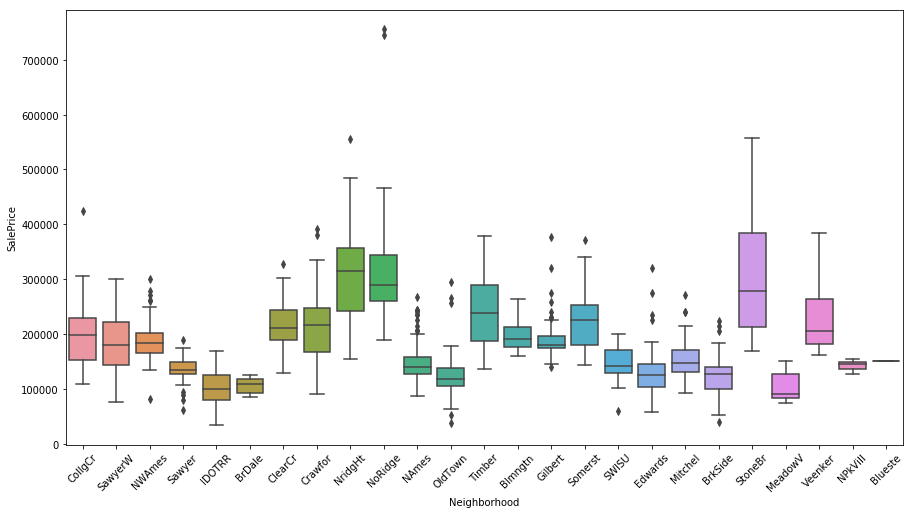

In [97]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('Neighborhood', 'SalePrice', data=train)

In [98]:
#IMPUTATION

In [99]:
#train["PoolQC"] = train["PoolQC"].fillna("None")
#train["MiscFeature"] = train["MiscFeature"].fillna("None")
for col in ('MiscFeature','Alley','Fence'):
    train[col]=train[col].fillna("None")
for col in ('PoolQC','GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)
print(train[['PoolQC','MiscFeature','Alley','Fence',"GarageYrBlt","GarageArea","GarageCars"]])

     PoolQC MiscFeature Alley  Fence  GarageYrBlt  GarageArea  GarageCars
0         0        None  None   GdWo       1978.0         336           1
1         0        None  None   None       1985.0         403           2
2         0        None  None   None       1968.0         508           2
3         0        None  None   None       1971.0         528           2
4         0        None  None  MnPrv       1974.0         336           1
5         0        None  None   None       1963.0         516           2
6         0        None  None  MnPrv       1922.0         240           1
7         0        None  None   None       1977.0         619           2
8         0        None  None   None       1971.0         264           1
9         0        None  None   None       1966.0         484           2
10        0        None  None   None       1969.0         540           2
11        0        None  None   GdWo       1959.0         484           2
12        0        None  None   None  

In [100]:
# Imputation Using Imputer
imp_mean = Imputer(missing_values = 'NaN', strategy='mean')
imp_mean.fit(train[['LotFrontage']])
train['LotFrontage'] = imp_mean.transform(train[['LotFrontage']])
imp_mean.fit(train[['MasVnrArea']])
train['MasVnrArea'] = imp_mean.transform(train[['MasVnrArea']])
print(train["MasVnrArea"])


#Mode value imputation
for col in ('FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtCond', 'BsmtFinType1','MasVnrType', 'Electrical'):
    train[col] = train[col].fillna(train[col].mode()[0])
print(train[col])

0        90.000000
1        85.000000
2         0.000000
3       144.000000
4         0.000000
5         0.000000
6         0.000000
7       424.000000
8       604.000000
9       252.000000
10        0.000000
11        0.000000
12      772.000000
13      166.000000
14      165.000000
15        0.000000
16        0.000000
17      630.000000
18        0.000000
19        0.000000
20      106.000000
21        0.000000
22      192.000000
23      288.000000
24       11.000000
25        0.000000
26      428.000000
27        0.000000
28      252.000000
29       72.000000
           ...    
1138    156.000000
1139    215.000000
1140      0.000000
1141    103.951724
1142     30.000000
1143    338.000000
1144    270.000000
1145    200.000000
1146      0.000000
1147     72.000000
1148    360.000000
1149    376.000000
1150    209.000000
1151    299.000000
1152      0.000000
1153      0.000000
1154     82.000000
1155      0.000000
1156      0.000000
1157      0.000000
1158      0.000000
1159      0.

In [101]:
total = train.isnull().sum(axis=0).sort_values(ascending=False)
percent = (train.isnull().sum(axis=0)/train.isnull().count(axis=0)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_missing_values_per_column', 'Percent'])
missing_data.head()
#NO MISSING DATA


,Total_missing_values_per_column,Percent
SalePrice,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0


In [102]:
#for col in list(train.columns:
    #plt.scatter(train[col],train.SalePrice)
    #plt.title(col)
   #plt.show()


In [103]:
#Feature Engineering
#train["flrsqftrng"]=abs(train["2ndFlrSF"]-train["1stFlrSF"]) #Difference in area of 1st floor & 2nd floor



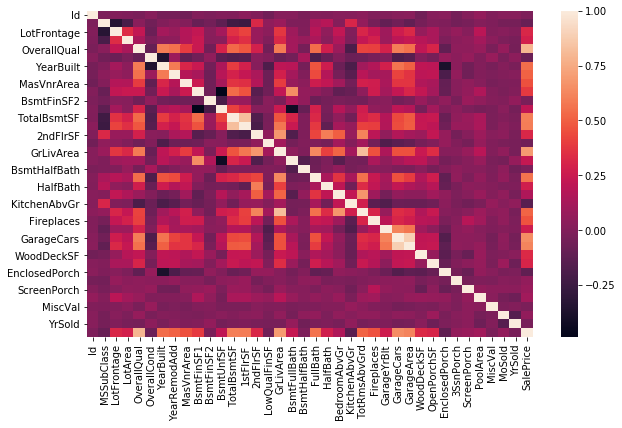

In [104]:
from sklearn.feature_selection import f_regression, mutual_info_regression
plt.figure(figsize=(10,6))
sns.heatmap(train.corr())

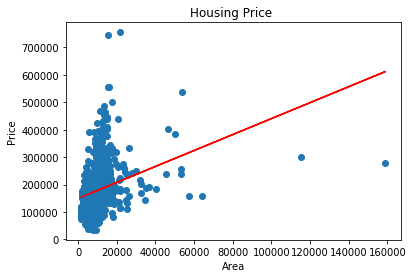

In [105]:

X = train.LotArea[:,np.newaxis]  # Reshape #creates a column vector
y = train.SalePrice


# Fitting Simple Linear Regression to the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)


# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred

## Plotting the Best Fitting Line

 # Train Part
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [106]:
#Multivariate
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,880,20,RL,70.18561,7000,Pave,None,IR1,Lvl,AllPub,...,0,0,GdWo,None,0,7,2009,WD,Normal,136500
1,1147,20,RL,70.18561,11200,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,0,5,2006,WD,Normal,180000
2,1347,20,RL,70.18561,20781,Pave,None,IR2,Lvl,AllPub,...,0,0,None,None,0,6,2006,WD,Normal,262500
3,1081,20,RL,80.00000,11040,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,0,10,2008,COD,Abnorml,145000
4,229,20,RL,70.00000,8521,Pave,None,Reg,Lvl,AllPub,...,0,0,MnPrv,None,0,5,2010,WD,Normal,125000
5,53,90,RM,110.00000,8472,Grvl,None,IR2,Bnk,AllPub,...,0,0,None,None,0,5,2010,WD,Normal,110000
6,1386,50,RM,40.00000,5436,Pave,None,Reg,Lvl,AllPub,...,0,0,MnPrv,None,0,5,2010,WD,Normal,125500
7,962,60,RL,70.18561,12227,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,0,7,2008,WD,Normal,272000
8,236,160,RM,21.00000,1680,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,0,8,2008,WD,Normal,89500
9,1042,60,RL,70.18561,9130,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,0,7,2008,WD,Normal,173000


In [113]:
# Numeric data segregation
numeric_feature = [a for a in range(len(train.dtypes)) if train.dtypes[a] in ['int64','float64']]
numeric_data = train.iloc[:,numeric_feature]
numeric_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,880,20,70.18561,7000,5,8,1978,2005,90.0,646,...,0,0,0,0,0,0,0,7,2009,136500
1,1147,20,70.18561,11200,6,5,1985,1985,85.0,1258,...,165,26,0,0,0,0,0,5,2006,180000
2,1347,20,70.18561,20781,7,7,1968,2003,0.0,297,...,0,80,0,290,0,0,0,6,2006,262500
3,1081,20,80.00000,11040,6,7,1971,2004,144.0,656,...,55,0,0,216,0,0,0,10,2008,145000
4,229,20,70.00000,8521,5,5,1967,1967,0.0,842,...,0,0,0,0,0,0,0,5,2010,125000


In [110]:
#Loading the data
NY_Housing = numeric_data

# making Independent and Dependent variables from the dataset
X = NY_Housing.iloc[:,:-1]
y = NY_Housing.SalePrice


In [115]:


# Fitting Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

print("intercept:", regressor.intercept_)
print("coefficients of predictors:", regressor.coef_)



# Predicting the results
y_pred = regressor.predict(X)
y_pred[:10]


prices = pd.DataFrame({"actual": y,
          "predicted": y_pred})
prices.head(10)


intercept: 269939.37594411196
coefficients of predictors: [-1.08350927e+00 -1.97151981e+02 -1.09794300e+02  3.23257701e-01
  1.77773310e+04  4.88404366e+03  3.65440261e+02  9.61097319e+01
  1.93961403e+01  9.14024751e+00 -1.06757707e+00 -1.13322814e-01
  7.95934762e+00  2.00959468e+01  2.62916132e+01 -2.07363599e+01
  2.56512001e+01  1.04125132e+04  2.70219712e+03  2.72177839e+03
 -5.01044814e+03 -8.26133382e+03 -1.06680073e+04  3.69146055e+03
  4.48660281e+03 -1.59331551e+01  2.07640626e+04 -6.86754028e+00
  3.33726648e+01 -2.11024402e+01  1.99657893e+01  3.98182820e+01
  4.66631573e+01 -1.39634740e+01 -3.24737589e-01  2.15640743e+02
 -6.03943137e+02]


,actual,predicted
0,136500,132087.040161
1,180000,195789.853703
2,262500,261516.451308
3,145000,187156.524030
4,125000,103031.971348
5,110000,107942.627026
6,125500,106594.140628
7,272000,294155.393527
8,89500,100032.669435
9,173000,180624.724740
